In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline

In [39]:
GE.to_json('GEid.json',orient='records')


In [40]:
combined_continuous_norm = pd.read_csv('combined_continuous_normalGE.csv')
combined_pairplot = pd.read_csv('combined_pairplot_GE.csv')

combined_continuous_norm['realSentiment'] = combined_pairplot['realSentiment']
combined_continuous_norm.head()

,Unnamed: 0,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment
0,1,-0.061124,-0.102946,-0.504513,0.637999,-0.053247,0.069264,0.229346,0.169471,neutral
1,2,-0.082387,-0.075422,0.299140,-0.184765,-0.275469,-0.097403,0.068242,0.182338,neutral
2,3,-0.079694,-0.102658,-0.473304,0.616224,0.080087,0.235931,0.047466,0.112376,neutral
3,4,-0.009259,0.507946,-0.279166,-0.200208,-0.275469,-0.097403,0.031768,-0.186547,neutral
4,5,-0.025490,0.078715,0.137330,-0.199754,0.146753,-0.097403,-0.637904,-0.186547,neutral


In [41]:
combined_continuous_norm=combined_continuous_norm.drop(['Unnamed: 0'], axis=1)
combined_continuous_norm.head()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment
0,-0.061124,-0.102946,-0.504513,0.637999,-0.053247,0.069264,0.229346,0.169471,neutral
1,-0.082387,-0.075422,0.299140,-0.184765,-0.275469,-0.097403,0.068242,0.182338,neutral
2,-0.079694,-0.102658,-0.473304,0.616224,0.080087,0.235931,0.047466,0.112376,neutral
3,-0.009259,0.507946,-0.279166,-0.200208,-0.275469,-0.097403,0.031768,-0.186547,neutral
4,-0.025490,0.078715,0.137330,-0.199754,0.146753,-0.097403,-0.637904,-0.186547,neutral


In [42]:
combined_continuous_norm.describe()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore
count,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02,1.540000e+02
mean,-2.680936e-18,-7.197976e-18,-2.018587e-17,-1.820333e-17,-1.937483e-18,1.586033e-17,7.209240e-18,4.397637e-17
std,1.511259e-01,1.770444e-01,3.008740e-01,2.550045e-01,2.022135e-01,1.559185e-01,2.336116e-01,2.332303e-01
min,-8.625323e-02,-1.043682e-01,-6.587731e-01,-2.036660e-01,-2.754690e-01,-3.474026e-01,-6.969218e-01,-6.278390e-01
25%,-7.879397e-02,-9.735162e-02,-2.534648e-01,-1.807067e-01,-1.643579e-01,-9.740260e-02,-7.112898e-02,-1.865471e-01
50%,-5.480571e-02,-7.973699e-02,9.858245e-02,-1.176844e-01,-3.102453e-02,-1.406926e-02,4.738627e-02,5.209907e-02
75%,4.689183e-03,1.440118e-02,2.766520e-01,9.885015e-02,1.411977e-01,6.926407e-02,1.674806e-01,2.051221e-01
max,9.137468e-01,8.956318e-01,3.412269e-01,7.963340e-01,7.245310e-01,6.525974e-01,3.030782e-01,3.721610e-01


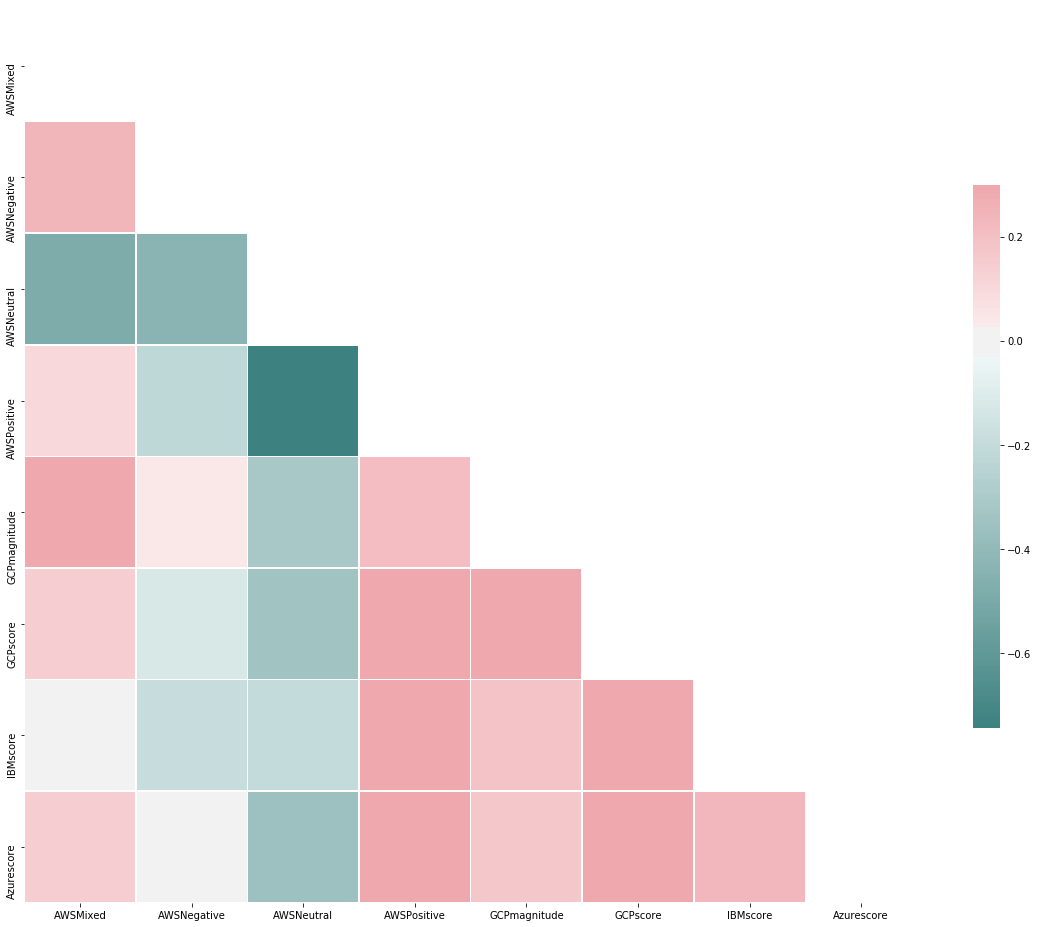

In [43]:
corr = combined_continuous_norm.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
median_priceAWSPositive	 = combined_continuous_norm.loc[:,"AWSPositive"].median()
print("median AWSPositive" ,median_priceAWSPositive)
median_priceAWSNegative = combined_continuous_norm.loc[:,"AWSNegative"].median()
print("median AWSNegative", median_priceAWSNegative)
median_priceGCPscore = combined_continuous_norm.loc[:,"GCPscore"].median()
print("median GCPscore",median_priceGCPscore)
median_priceIBMscore = combined_continuous_norm.loc[:,"IBMscore"].median()
print("median IBMscore", median_priceIBMscore)
median_priceAzurescore = combined_continuous_norm.loc[:,"Azurescore"].median()
print("median Azurescore", median_priceAzurescore)



median AWSPositive -0.1176844034726473
median AWSNegative -0.07973699011443175
median GCPscore -0.01406926474121398
median IBMscore 0.04738627092438748
median Azurescore 0.05209907426650417


Adding column to dataframe for holding categorical price value : pOSITIVE/NEGATIVE
All values < median are POSITIVE and Values >= median are NEGATIVE
(EXCEPT AWSNEGATIVE)

In [45]:
combined_continuous_norm['AWSPositive_SENTIMENT'] = combined_continuous_norm['AWSPositive'].apply(lambda x: 'positive' if x > median_priceAWSPositive else 'negative')
combined_continuous_norm['AWSNegative_SENTIMENT'] = combined_continuous_norm['AWSNegative'].apply(lambda x: 'negative' if x > median_priceAWSNegative else 'positive')
combined_continuous_norm['GCPscore_SENTIMENT'] = combined_continuous_norm['GCPscore'].apply(lambda x: 'positive' if x > median_priceGCPscore else 'negative')
combined_continuous_norm['IBMscore_SENTIMENT'] = combined_continuous_norm['IBMscore'].apply(lambda x: 'positive' if x > median_priceIBMscore else 'negative')
combined_continuous_norm['Azurescore_SENTIMENT'] = combined_continuous_norm['Azurescore'].apply(lambda x: 'positive' if x > median_priceAzurescore else 'negative')
combined_continuous_norm.head()


,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment,AWSPositive_SENTIMENT,AWSNegative_SENTIMENT,GCPscore_SENTIMENT,IBMscore_SENTIMENT,Azurescore_SENTIMENT
0,-0.061124,-0.102946,-0.504513,0.637999,-0.053247,0.069264,0.229346,0.169471,neutral,positive,positive,positive,positive,positive
1,-0.082387,-0.075422,0.299140,-0.184765,-0.275469,-0.097403,0.068242,0.182338,neutral,negative,negative,negative,positive,positive
2,-0.079694,-0.102658,-0.473304,0.616224,0.080087,0.235931,0.047466,0.112376,neutral,positive,positive,positive,positive,positive
3,-0.009259,0.507946,-0.279166,-0.200208,-0.275469,-0.097403,0.031768,-0.186547,neutral,negative,negative,negative,negative,negative
4,-0.025490,0.078715,0.137330,-0.199754,0.146753,-0.097403,-0.637904,-0.186547,neutral,negative,negative,negative,negative,negative


In [47]:
from sklearn.metrics import confusion_matrix


In [46]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

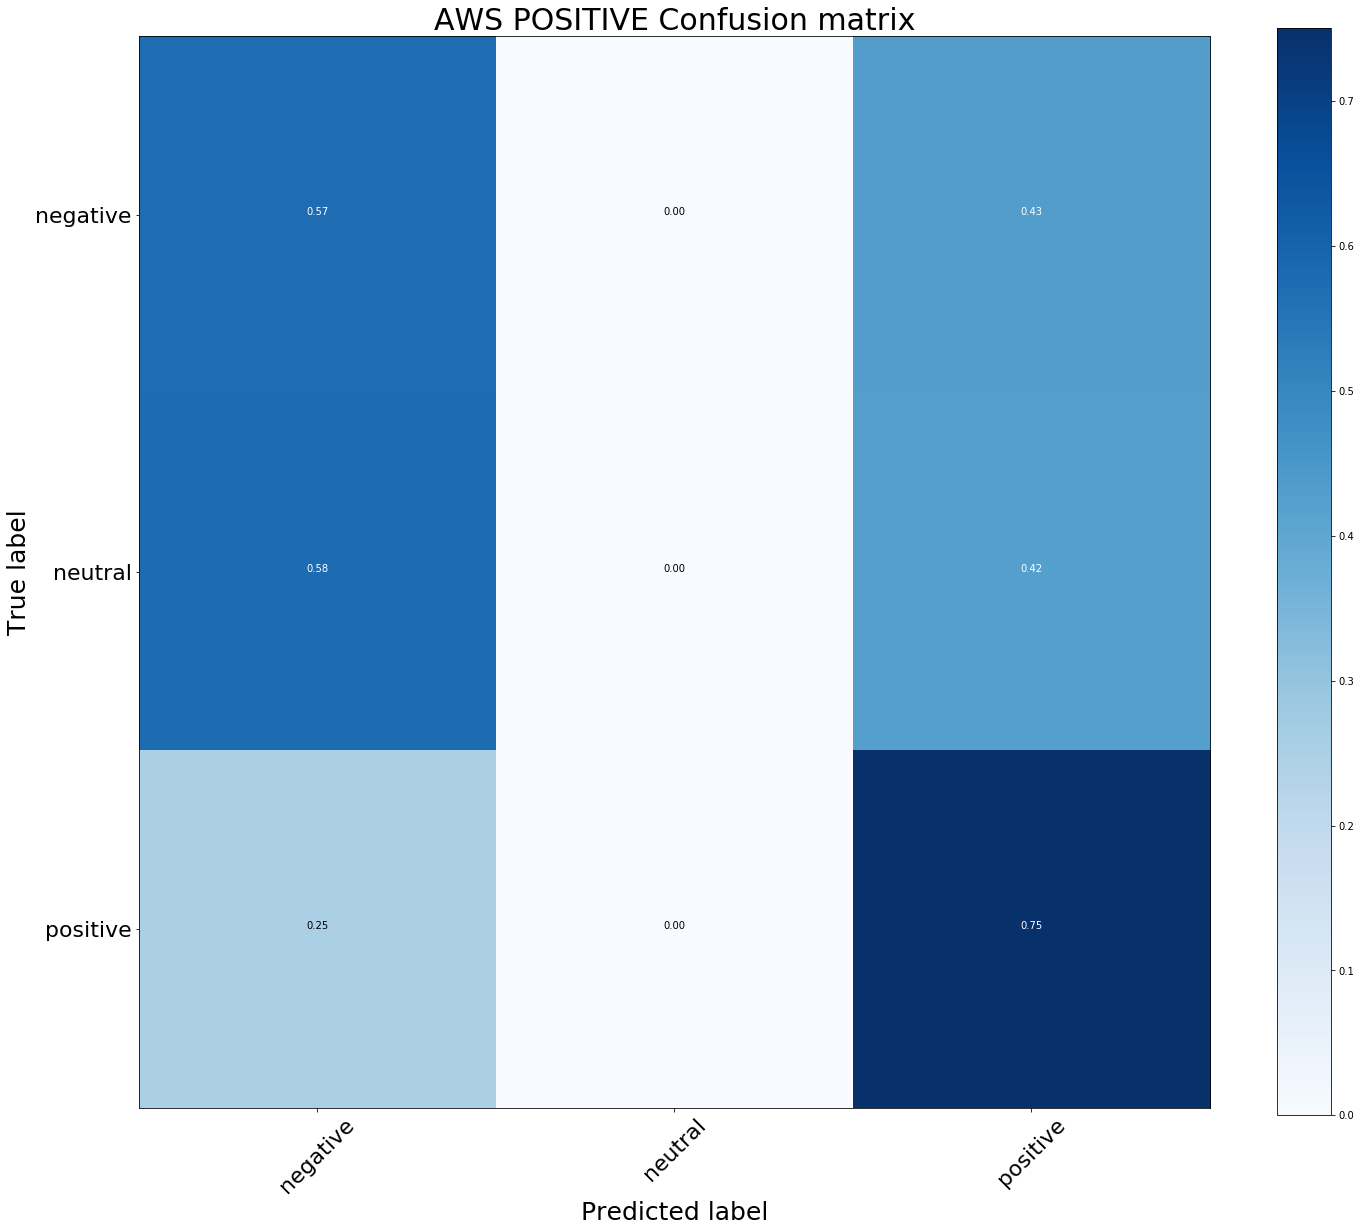

In [48]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
import itertools

train_tags = combined_continuous_norm['realSentiment'][:128]
encoder = LabelEncoder()
encoder.fit(train_tags)

text_labels = encoder.classes_ 

cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['AWSPositive_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="AWS POSITIVE Confusion matrix")
plt.show()


In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['AWSPositive_SENTIMENT'])


0.2012987012987013

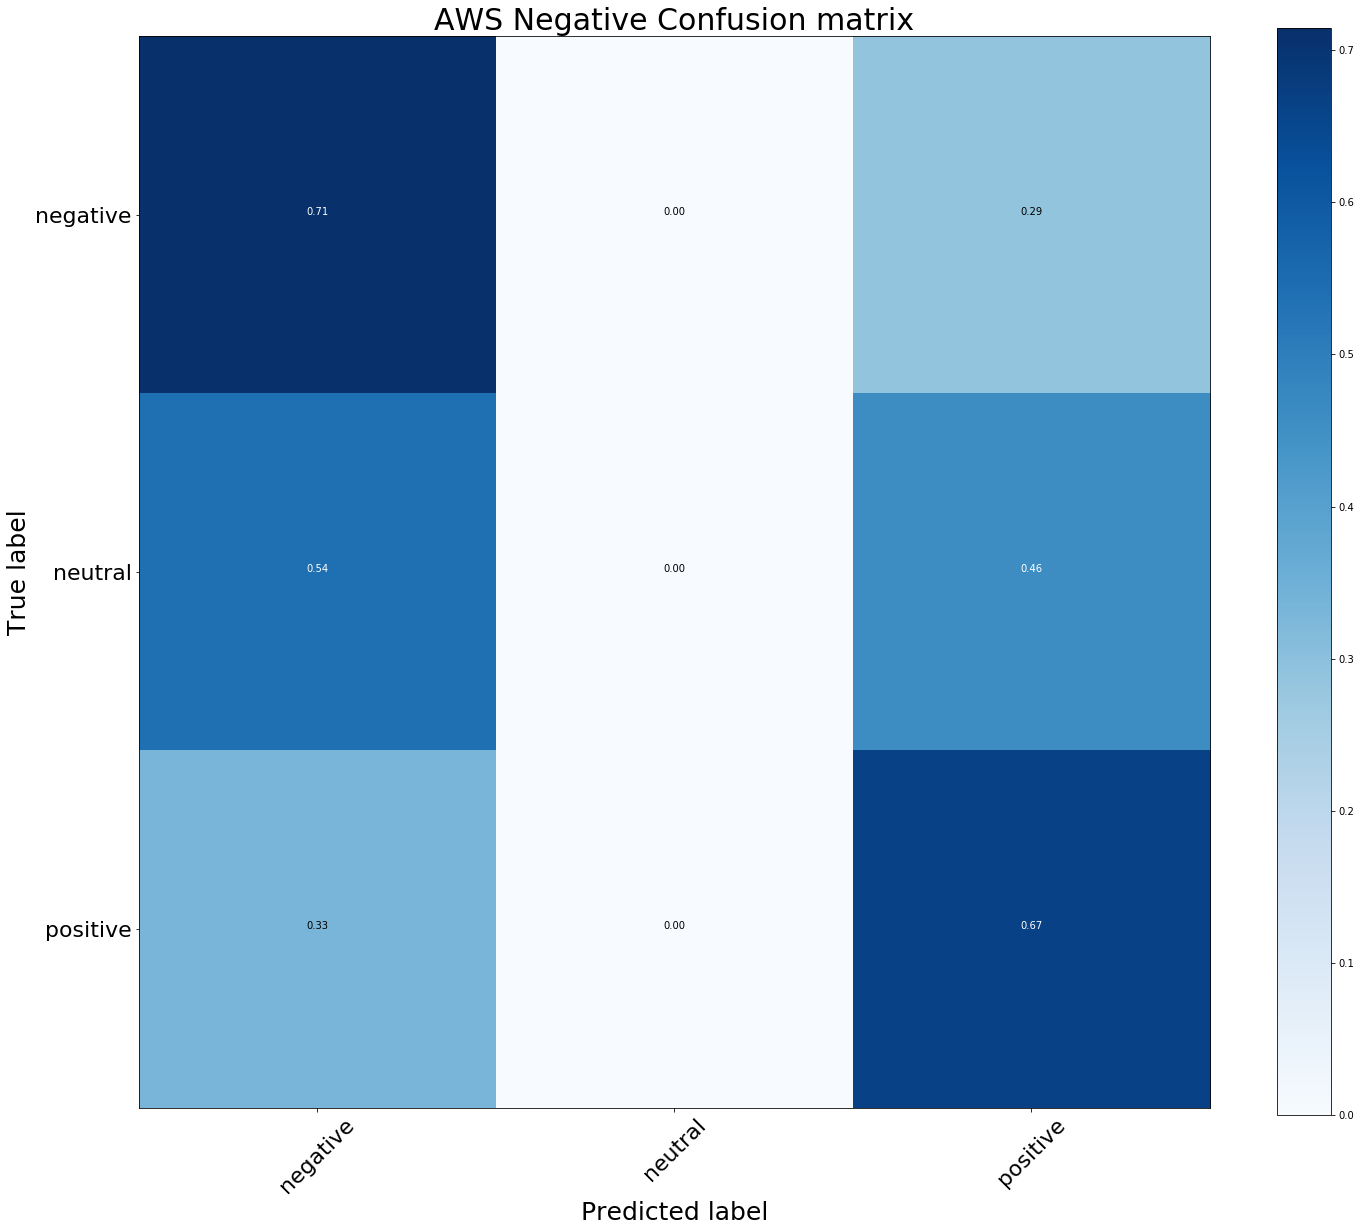

In [50]:
cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['AWSNegative_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="AWS Negative Confusion matrix")
plt.show()


In [51]:
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['AWSNegative_SENTIMENT'])


0.18831168831168832

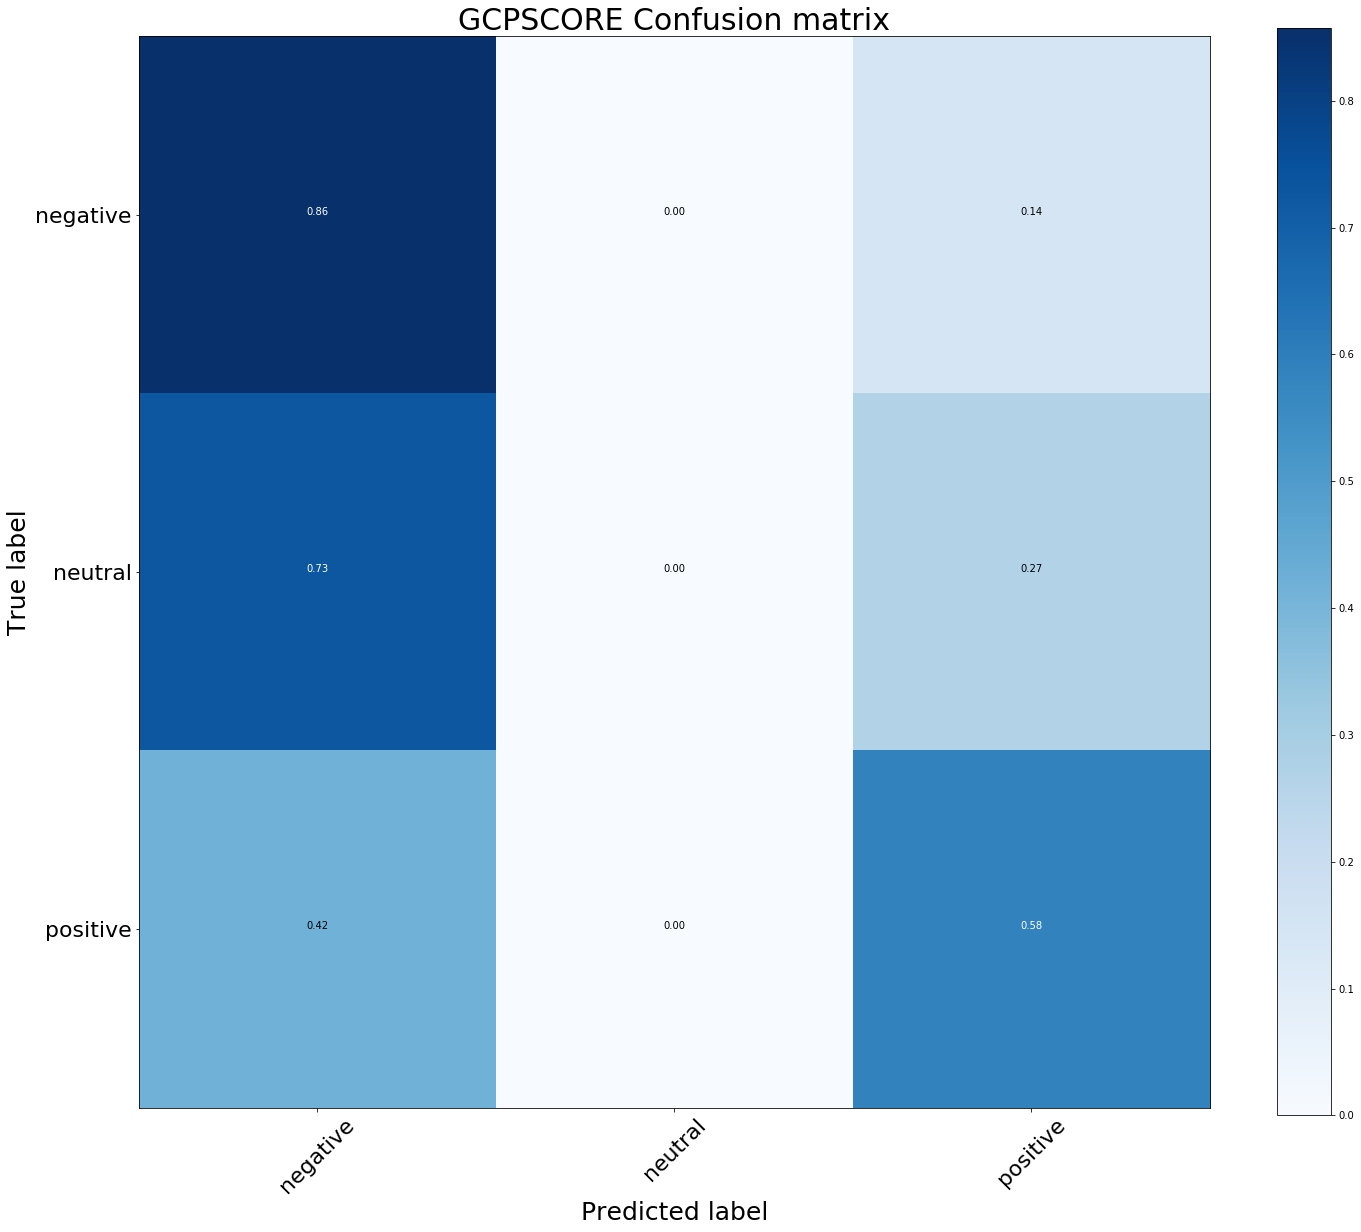

In [52]:
cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['GCPscore_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="GCPSCORE Confusion matrix")
plt.show()


In [53]:
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['GCPscore_SENTIMENT'])


0.17532467532467533

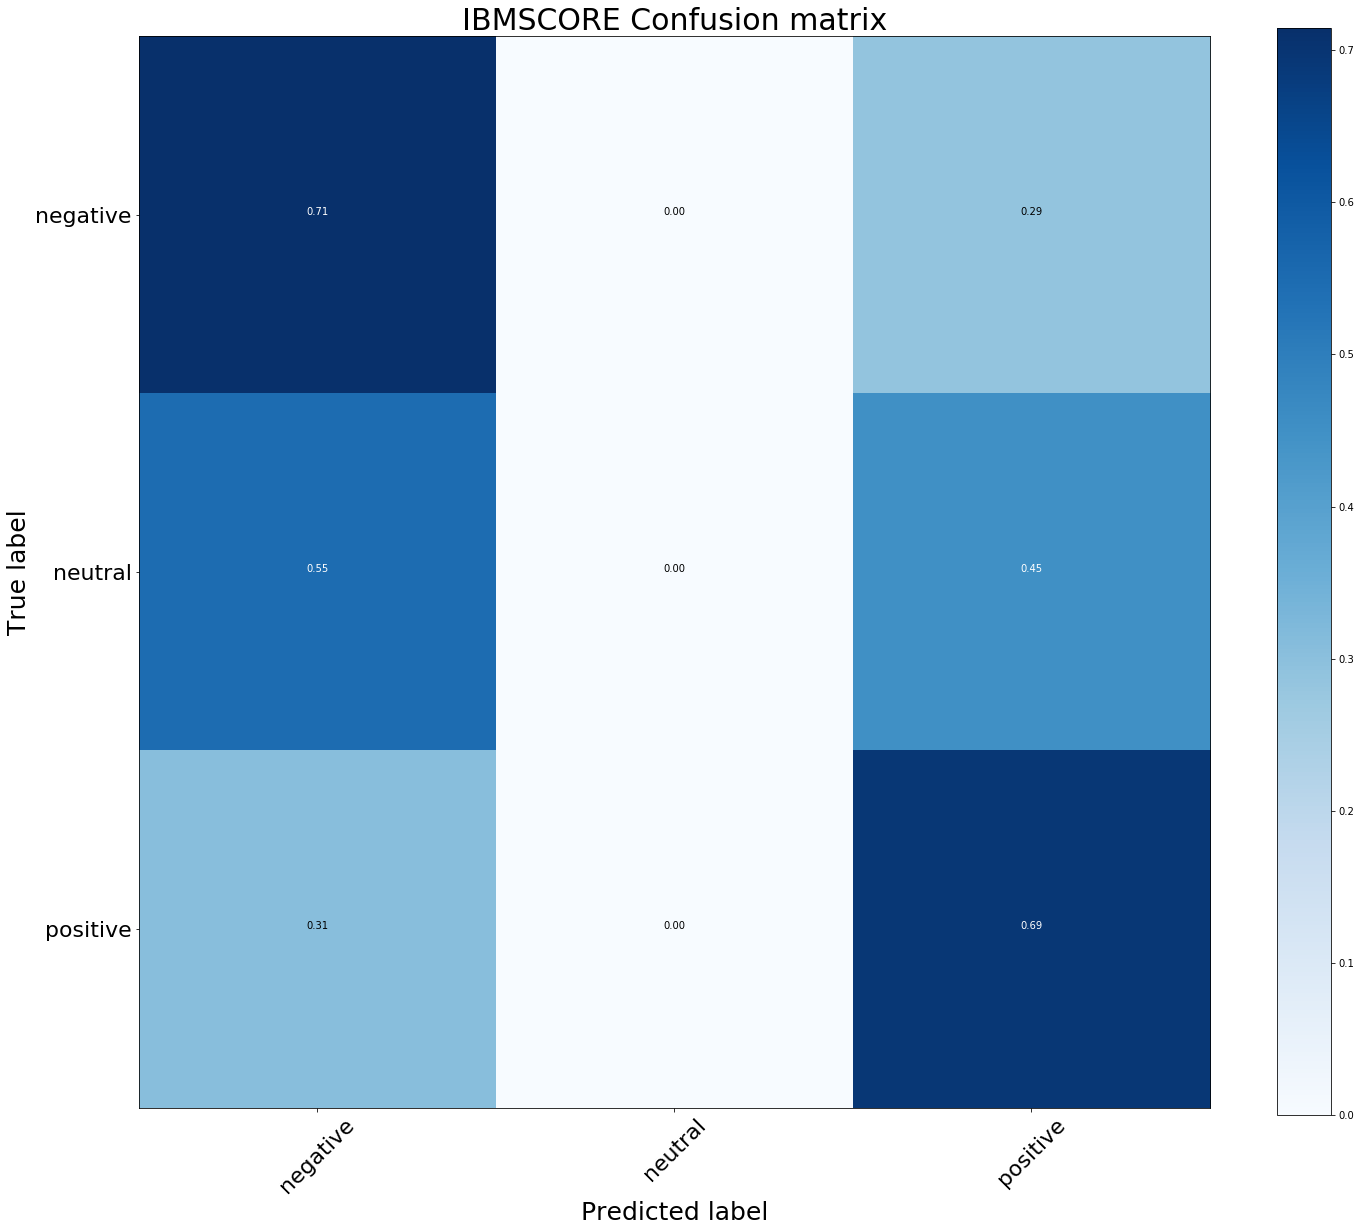

In [54]:
cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['IBMscore_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="IBMSCORE Confusion matrix")
plt.show()


In [55]:
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['IBMscore_SENTIMENT'])


0.19480519480519481

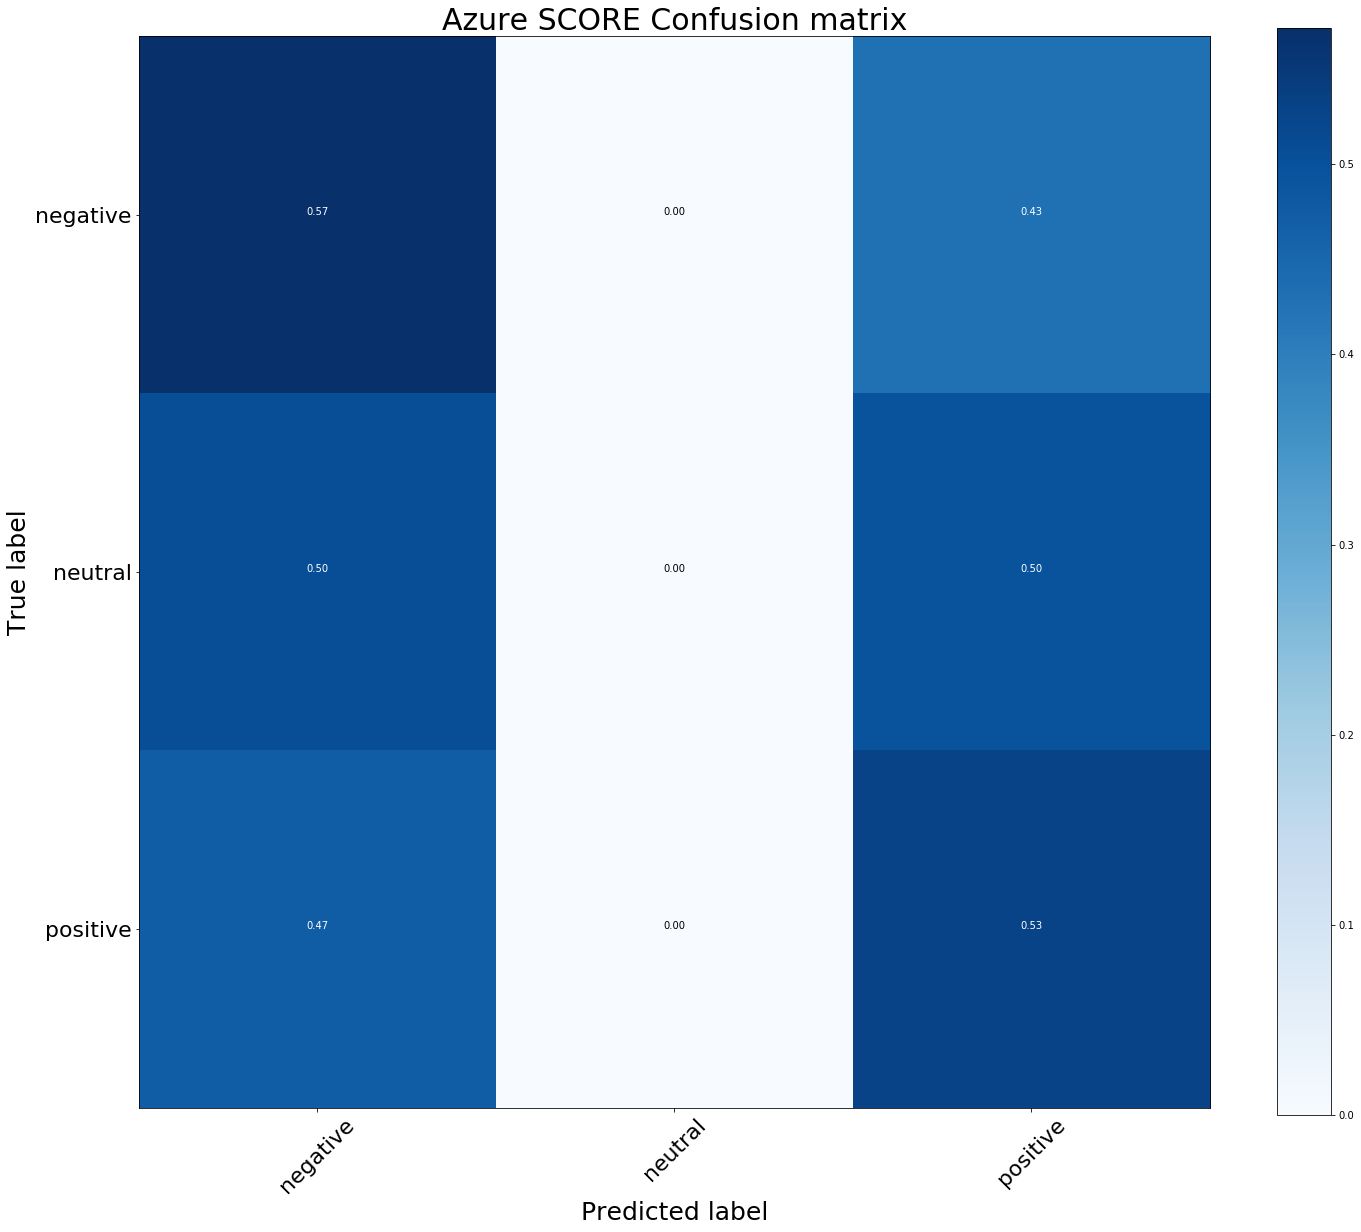

In [56]:
cnf_matrix = confusion_matrix(combined_continuous_norm['realSentiment'], combined_continuous_norm['Azurescore_SENTIMENT'])
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Azure SCORE Confusion matrix")
plt.show()


In [57]:
accuracy_score(combined_continuous_norm['realSentiment'], combined_continuous_norm['Azurescore_SENTIMENT'])


0.14935064935064934

## Random Forest Classifier


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
combined_continuous_norm=combined_continuous_norm[combined_continuous_norm.realSentiment != 'neutral']
combined_continuous_norm.head()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment,AWSPositive_SENTIMENT,AWSNegative_SENTIMENT,GCPscore_SENTIMENT,IBMscore_SENTIMENT,Azurescore_SENTIMENT
5,-0.023712,-0.045114,0.101151,-0.045927,0.257864,0.152597,0.205028,-0.186547,positive,positive,negative,positive,positive,negative
7,-0.008054,-0.080234,0.096014,-0.015501,0.368975,0.319264,0.211273,0.060953,positive,positive,positive,positive,positive,positive
12,0.033082,-0.086301,-0.255242,0.321486,0.057864,-0.097403,-0.103225,-0.186547,positive,positive,positive,negative,negative,negative
14,-0.053159,0.895632,-0.622652,-0.202365,0.168975,-0.097403,-0.581494,-0.186547,negative,negative,negative,negative,negative,negative
21,-0.043726,-0.102928,-0.558246,0.682744,0.124531,0.069264,0.023744,-0.186547,positive,positive,positive,positive,negative,negative


In [61]:
combined_continuous_norm['realSentiment'] = combined_continuous_norm['realSentiment'].apply(lambda x: 1 if x == 'positive' else 0)
combined_continuous_norm.head()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment,AWSPositive_SENTIMENT,AWSNegative_SENTIMENT,GCPscore_SENTIMENT,IBMscore_SENTIMENT,Azurescore_SENTIMENT
5,-0.023712,-0.045114,0.101151,-0.045927,0.257864,0.152597,0.205028,-0.186547,1,positive,negative,positive,positive,negative
7,-0.008054,-0.080234,0.096014,-0.015501,0.368975,0.319264,0.211273,0.060953,1,positive,positive,positive,positive,positive
12,0.033082,-0.086301,-0.255242,0.321486,0.057864,-0.097403,-0.103225,-0.186547,1,positive,positive,negative,negative,negative
14,-0.053159,0.895632,-0.622652,-0.202365,0.168975,-0.097403,-0.581494,-0.186547,0,negative,negative,negative,negative,negative
21,-0.043726,-0.102928,-0.558246,0.682744,0.124531,0.069264,0.023744,-0.186547,1,positive,positive,positive,negative,negative


In [62]:
combined_continuous_norm=pd.get_dummies(combined_continuous_norm)

In [63]:
combined_continuous_norm.head()

,AWSMixed,AWSNegative,AWSNeutral,AWSPositive,GCPmagnitude,GCPscore,IBMscore,Azurescore,realSentiment,AWSPositive_SENTIMENT_negative,AWSPositive_SENTIMENT_positive,AWSNegative_SENTIMENT_negative,AWSNegative_SENTIMENT_positive,GCPscore_SENTIMENT_negative,GCPscore_SENTIMENT_positive,IBMscore_SENTIMENT_negative,IBMscore_SENTIMENT_positive,Azurescore_SENTIMENT_negative,Azurescore_SENTIMENT_positive
5,-0.023712,-0.045114,0.101151,-0.045927,0.257864,0.152597,0.205028,-0.186547,1,0,1,1,0,0,1,0,1,1,0
7,-0.008054,-0.080234,0.096014,-0.015501,0.368975,0.319264,0.211273,0.060953,1,0,1,0,1,0,1,0,1,0,1
12,0.033082,-0.086301,-0.255242,0.321486,0.057864,-0.097403,-0.103225,-0.186547,1,0,1,0,1,1,0,1,0,1,0
14,-0.053159,0.895632,-0.622652,-0.202365,0.168975,-0.097403,-0.581494,-0.186547,0,1,0,1,0,1,0,1,0,1,0
21,-0.043726,-0.102928,-0.558246,0.682744,0.124531,0.069264,0.023744,-0.186547,1,0,1,0,1,0,1,1,0,1,0


In [64]:
combined_continuous_norm.columns

Index(['AWSMixed', 'AWSNegative', 'AWSNeutral', 'AWSPositive', 'GCPmagnitude',
       'GCPscore', 'IBMscore', 'Azurescore', 'realSentiment',
       'AWSPositive_SENTIMENT_negative', 'AWSPositive_SENTIMENT_positive',
       'AWSNegative_SENTIMENT_negative', 'AWSNegative_SENTIMENT_positive',
       'GCPscore_SENTIMENT_negative', 'GCPscore_SENTIMENT_positive',
       'IBMscore_SENTIMENT_negative', 'IBMscore_SENTIMENT_positive',
       'Azurescore_SENTIMENT_negative', 'Azurescore_SENTIMENT_positive'],
      dtype='object')

In [65]:
from sklearn.model_selection import train_test_split

X=combined_continuous_norm[['AWSMixed', 'AWSNegative', 'AWSNeutral', 'AWSPositive', 'GCPmagnitude',
       'GCPscore', 'IBMscore', 'Azurescore', 
       'AWSPositive_SENTIMENT_negative', 'AWSPositive_SENTIMENT_positive',
       'AWSNegative_SENTIMENT_negative', 'AWSNegative_SENTIMENT_positive',
       'GCPscore_SENTIMENT_negative', 'GCPscore_SENTIMENT_positive',
       'IBMscore_SENTIMENT_negative', 'IBMscore_SENTIMENT_positive',
       'Azurescore_SENTIMENT_negative', 'Azurescore_SENTIMENT_positive']]  # Features

y=combined_continuous_norm['realSentiment']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [66]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [67]:
accuracy_score(y_test, y_pred)


0.6923076923076923

In [68]:
from sklearn.model_selection import RandomizedSearchCV